## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice
mice_num = combined_mouse_data["Mouse ID"].count()
mice_num

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_id = combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID"])]
all_duplicate_id.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_data.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_num = clean_df["Mouse ID"].count()
clean_mice_num

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

single_summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dev, 
                                "SEM": sem})
single_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_line = combined_mouse_data.groupby('Drug Regimen')
individual_summary = single_line.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
individual_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_data = pd.DataFrame(combined_mouse_data.groupby(["Drug Regimen"]).count()).reset_index()

drug_reg = drug_data[["Drug Regimen", "Mouse ID"]]
drug_reg = drug_reg.set_index("Drug Regimen")


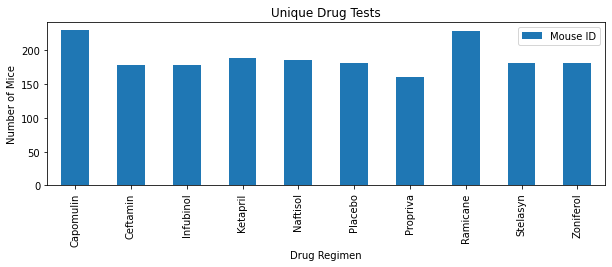

<Figure size 432x288 with 0 Axes>

In [10]:
drug_reg.plot(kind="bar", figsize=(10,3))

plt.title("Unique Drug Tests")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drugs_list = single_summary_df.index.tolist()
drugs_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [12]:
drug_count = (combined_mouse_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Number of Mice')

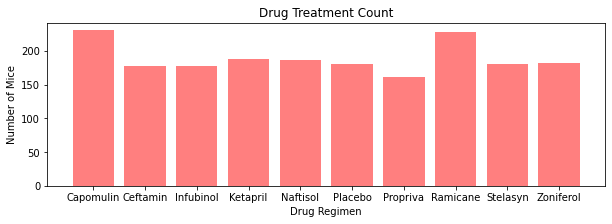

In [13]:
x_axis = np.arange(len(drug_count))

x_axis = drugs_list

plt.figure(figsize=(10,3)) 
plt.bar(x_axis, drug_count, color='r', alpha=0.5, align="center") 
plt.title("Drug Treatment Count") 
plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Mice")

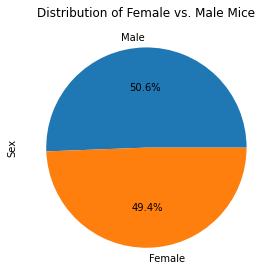

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = combined_mouse_data["Sex"].value_counts()
plt.figure()

gender_df.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()

plt.title("Distribution of Female vs. Male Mice")
plt.tight_layout()
plt.show()

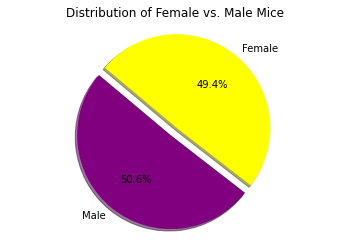

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["purple","yellow"]
explode = (0.1,0)
plt.figure()
plt.pie(gender_df.values, explode=explode, labels=gender_df.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Distribution of Female vs. Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] == "Ceftamin", :]

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset  
    # Determine outliers using upper and lower bounds
    

In [18]:
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, combined_mouse_data, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [19]:
#Capomulin

capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles =capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
#Ramicane

ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, combined_mouse_data, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [21]:
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles =ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [22]:
# Infubinol

infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, combined_mouse_data, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [23]:
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles =infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [24]:
#Ceftamin

ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, combined_mouse_data, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [25]:
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


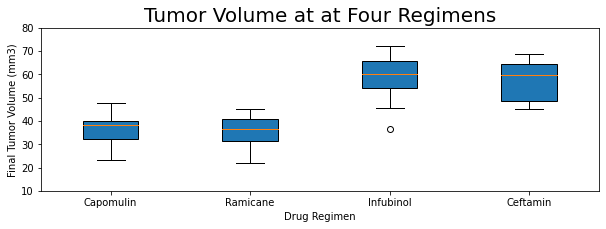

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(10, 3))
ax1.set_title('Tumor Volume at at Four Regimens',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 10)
ax1.set_xlabel('Drug Regimen',fontsize = 10)
ax1.boxplot(data_plot, labels=regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.show()


## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] == "Capomulin"] 
capomulin_df =capomulin_df.reset_index() 
capomulin_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...,...
225,440,i557,Capomulin,Female,1,24,45,47.685963,1
226,1452,r157,Capomulin,Male,22,25,0,45.000000,0
227,1453,r157,Capomulin,Male,22,25,5,45.597064,0
228,1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [28]:
one_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "r157"]
one_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
226,1452,r157,Capomulin,Male,22,25,0,45.000000,0
227,1453,r157,Capomulin,Male,22,25,5,45.597064,0
228,1454,r157,Capomulin,Male,22,25,10,46.059608,0
229,1455,r157,Capomulin,Male,22,25,15,46.539206,0


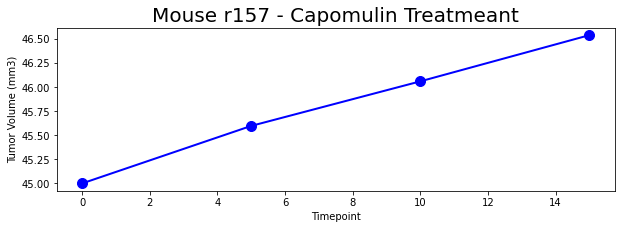

In [29]:
x_axis = one_mouse["Timepoint"]
tum_size = one_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 3))
plt.title('Mouse r157 - Capomulin Treatmeant',fontsize =20)
plt.plot(x_axis, tum_size,linewidth=2, markersize=10,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint',fontsize =10)
plt.ylabel('Tumor Volume (mm3)',fontsize =10)

plt.show()

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_data = combined_mouse_data[(combined_mouse_data["Drug Regimen"] == "Capomulin")]
scatter_data = scatter_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
group_by_data = scatter_data.groupby(["Mouse ID","Weight (g)"])
scatter_data_df = group_by_data["Tumor Volume (mm3)"].mean().to_frame()
scatter_data_df = scatter_data_df.reset_index
scatter_data.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876


<Figure size 432x288 with 0 Axes>

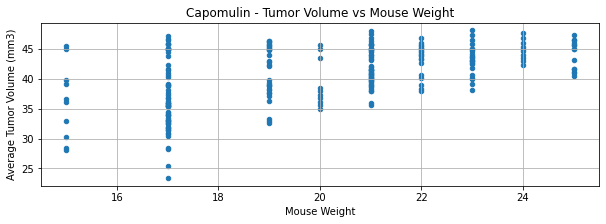

In [31]:
plt.figure()
scatter_data.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", figsize=(10,3), marker="o")

plt.title("Capomulin - Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()


## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


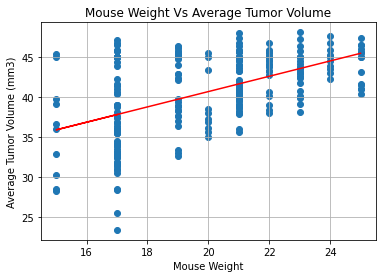

In [33]:
x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Tumor Volume (mm3)"]
plt.figure()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()